# ANPR Image Preprocessing: Step-by-Step Notebook

This notebook demonstrates the key image preprocessing steps for Automatic Number Plate Recognition (ANPR) based on the article [ANPR Series Part 1: Advanced Image Preprocessing Techniques](https://henok.cloud/articles/anpr-part-1-image-preprocessing/).

**Outline:**
1. Import Required Libraries
2. Load and Display the Input Image
3. Convert Image to Grayscale
4. Apply Gaussian Blur
5. Perform Edge Detection
6. Apply Morphological Operations
7. Find and Draw Contours

---

## 1. Import Required Libraries
We will use OpenCV, NumPy, and Matplotlib for image processing and visualization.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# For notebook display
%matplotlib inline

## 2. Load and Display the Input Image

Let's load a sample number plate image using OpenCV and display it using Matplotlib. Replace `'sample_plate.jpg'` with your own image file if needed.

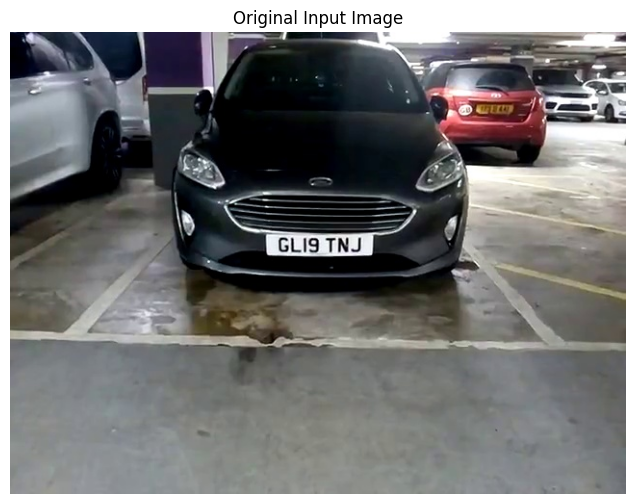

In [10]:
# Load the image (replace with your image path)
image_path = './sample_images/sample_plate.jpg'  # Update this path as needed
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}. Please check the path.")

# Convert BGR (OpenCV default) to RGB for Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title('Original Input Image')
plt.axis('off')
plt.show()

## 3. Convert Image to Grayscale

Converting the image to grayscale simplifies further processing and reduces computational complexity.

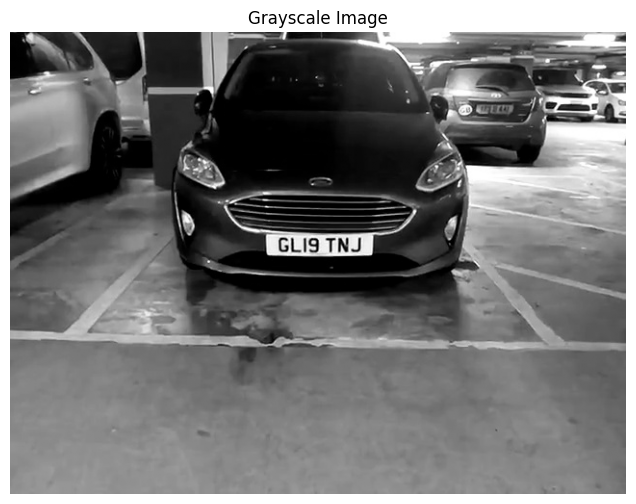

In [11]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

## 4. Apply Gaussian Blur

Gaussian blur helps to reduce image noise and detail, making edge detection more robust.

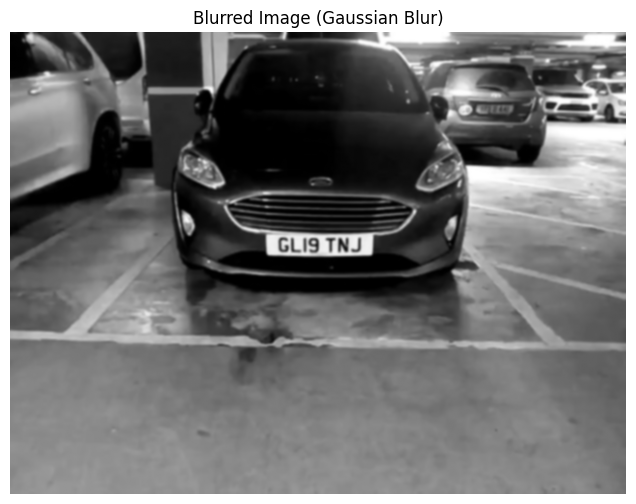

In [12]:
# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.figure(figsize=(8, 6))
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image (Gaussian Blur)')
plt.axis('off')
plt.show()

## 5. Perform Edge Detection

Edge detection highlights the boundaries in the image, which is useful for locating the number plate.

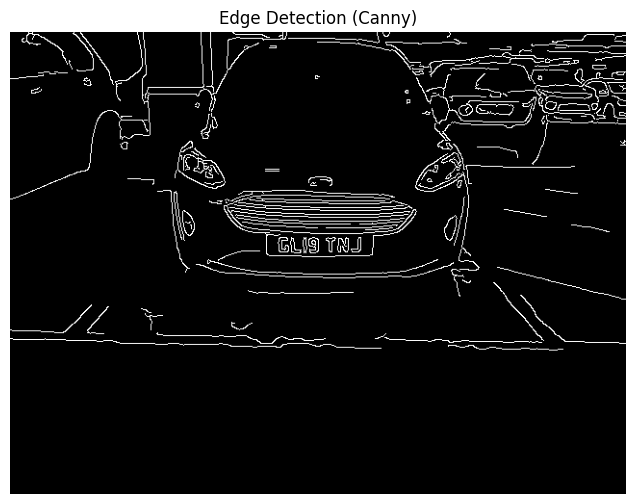

In [13]:
# Perform Canny edge detection
edges = cv2.Canny(blurred, 100, 200)

plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')
plt.show()

## 6. Apply Morphological Operations

Morphological transformations such as dilation and erosion help to enhance the edges and close gaps, making it easier to detect contours.

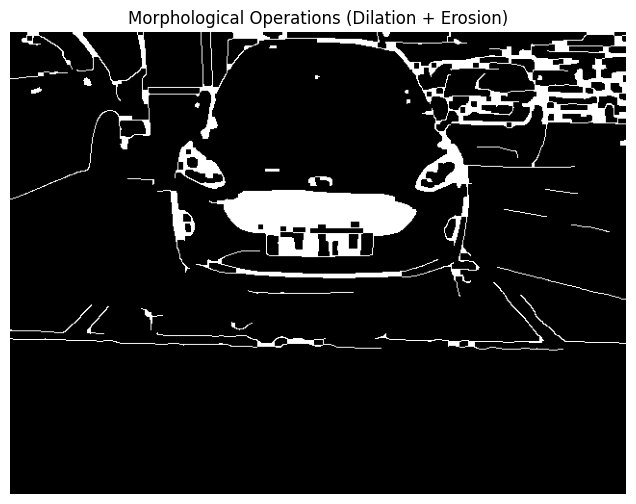

In [14]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply dilation followed by erosion (closing)
dilated = cv2.dilate(edges, kernel, iterations=1)
eroded = cv2.erode(dilated, kernel, iterations=1)

plt.figure(figsize=(8, 6))
plt.imshow(eroded, cmap='gray')
plt.title('Morphological Operations (Dilation + Erosion)')
plt.axis('off')
plt.show()

## 7. Find and Draw Contours

Contours help us identify the boundaries of objects in the image. We can use them to locate potential number plate regions.

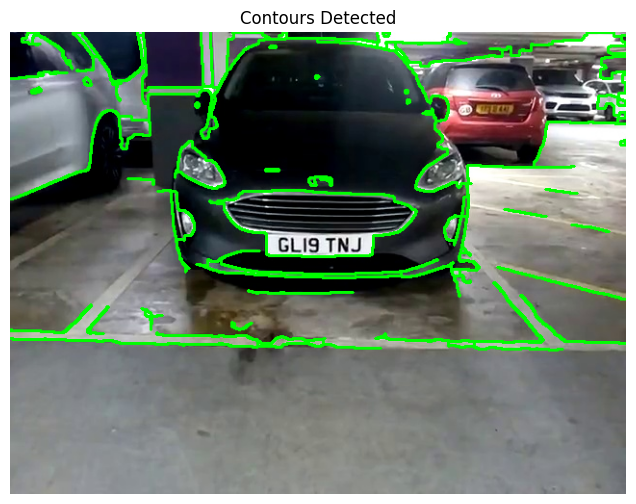

Number of contours found: 30


In [15]:
# Find contours in the processed image
contours, _ = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_img = image_rgb.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(8, 6))
plt.imshow(contour_img)
plt.title('Contours Detected')
plt.axis('off')
plt.show()

print(f"Number of contours found: {len(contours)}")